# 🎬 Movie Genre Classification using Machine Learning

In [25]:
from google.colab import files
import zipfile
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
uploaded = files.upload()

Saving archive.zip to archive.zip


In [3]:
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('movie_genre_dataset')

In [4]:
train_records = []
with open('movie_genre_dataset/Genre Classification Dataset/train_data.txt', 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split(" ::: ")
        if len(parts) == 4:
            movie_id, title, genre, plot = parts
            train_records.append({
                "id": movie_id,
                "title": title,
                "genre": genre,
                "plot": plot
            })

train_df = pd.DataFrame(train_records)
train_df.head()

,id,title,genre,plot
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [5]:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(train_df['plot'])
y = train_df['genre']

In [8]:
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))


In [9]:
model = LogisticRegression(max_iter=1000, class_weight=class_weights_dict)
model.fit(X_train, y_train)

LogisticRegression(class_weight={'action': np.float64(1.5269328263624842),
                                 'adult': np.float64(3.3605299860529985),
                                 'adventure': np.float64(2.5256813417190775),
                                 'animation': np.float64(4.076988155668359),
                                 'biography': np.float64(7.874183006535947),
                                 'comedy': np.float64(0.2675438596491228),
                                 'crime': np.float64(4.036013400335008),
                                 'documentary': np.float64(0.153907...
                                 'reality-tv': np.float64(2.321290944123314),
                                 'romance': np.float64(3.0831733845169547),
                                 'sci-fi': np.float64(3.187169312169312),
                                 'short': np.float64(0.39879179079774907),
                                 'sport': np.float64(4.738446411012783),
                                 'talk-show': np.float64(5.181720430107527),
                                 'thriller': np.float64(1.2529901196047841),
                                 'war': np.float64(14.342261904761905),
                                 'western': np.float64(1.9306891025641026)},
                   max_iter=1000)

In [10]:
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred, zero_division=0))

Accuracy: 0.4490454671216453

Classification Report:
               precision    recall  f1-score   support

      action       0.33      0.43      0.37       263
       adult       0.26      0.62      0.37       112
   adventure       0.16      0.31      0.21       139
   animation       0.18      0.33      0.23       104
   biography       0.05      0.16      0.07        61
      comedy       0.62      0.43      0.51      1443
       crime       0.15      0.39      0.21       107
 documentary       0.81      0.53      0.65      2659
       drama       0.71      0.36      0.48      2697
      family       0.12      0.33      0.18       150
     fantasy       0.10      0.19      0.13        74
   game-show       0.62      0.75      0.68        40
     history       0.05      0.20      0.08        45
      horror       0.56      0.69      0.62       431
       music       0.36      0.77      0.49       144
     musical       0.11      0.32      0.16        50
     mystery       0.08    

In [11]:
svm_model = LinearSVC(class_weight='balanced')
svm_model.fit(X_train, y_train)

LinearSVC(class_weight='balanced')

In [12]:
svm_preds = svm_model.predict(X_val)

In [13]:
print("SVM Accuracy:", accuracy_score(y_val, svm_preds))
print("\nSVM Classification Report:\n", classification_report(y_val, svm_preds, zero_division=0))

SVM Accuracy: 0.48667342986258416

SVM Classification Report:
               precision    recall  f1-score   support

      action       0.28      0.40      0.33       263
       adult       0.30      0.55      0.39       112
   adventure       0.14      0.27      0.18       139
   animation       0.16      0.24      0.19       104
   biography       0.02      0.03      0.02        61
      comedy       0.58      0.46      0.51      1443
       crime       0.14      0.26      0.19       107
 documentary       0.77      0.67      0.72      2659
       drama       0.67      0.44      0.53      2697
      family       0.12      0.26      0.17       150
     fantasy       0.07      0.12      0.09        74
   game-show       0.58      0.72      0.64        40
     history       0.04      0.07      0.05        45
      horror       0.50      0.68      0.58       431
       music       0.38      0.68      0.49       144
     musical       0.08      0.18      0.11        50
     mystery      

In [14]:
tfidf = TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1, 2))
X = tfidf.fit_transform(train_df['plot'])

In [15]:
tfidf = TfidfVectorizer(stop_words='english', max_features=10000, ngram_range=(1, 2))
X = tfidf.fit_transform(train_df['plot'])
y = train_df['genre']

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
svm_model = LinearSVC(class_weight='balanced')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_val)

print("SVM with Bigrams Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred, zero_division=0))

SVM with Bigrams Accuracy: 0.5159088813059116

Classification Report:
               precision    recall  f1-score   support

      action       0.31      0.43      0.36       263
       adult       0.37      0.54      0.44       112
   adventure       0.18      0.35      0.24       139
   animation       0.16      0.22      0.19       104
   biography       0.01      0.02      0.02        61
      comedy       0.57      0.50      0.54      1443
       crime       0.13      0.19      0.15       107
 documentary       0.76      0.71      0.73      2659
       drama       0.67      0.49      0.57      2697
      family       0.15      0.26      0.19       150
     fantasy       0.08      0.08      0.08        74
   game-show       0.60      0.70      0.64        40
     history       0.04      0.04      0.04        45
      horror       0.54      0.72      0.62       431
       music       0.40      0.69      0.51       144
     musical       0.08      0.12      0.09        50
     myste

In [28]:
with open("/content/movie_genre_dataset/Genre Classification Dataset/test_data.txt", "r", encoding='utf-8') as f:
    test_data = f.readlines()
test_data = [line.strip() for line in test_data if line.strip()]


In [29]:
X_test = tfidf.transform(test_data)

In [20]:
test_preds = svm_model.predict(X_test)

In [21]:
for i, (summary, genre) in enumerate(zip(test_data, test_preds)):
    print(f"Movie {i+1}:")
    print("Plot:", summary)
    print("Predicted Genre:", genre)
    print("—" * 40)

Streaming output truncated to the last 5000 lines.
Movie 52951:
Plot: 52951 ::: Cheryomushki (1963) ::: The title of the film (literally "Cherry Town") refers to new towns or neighborhoods based on middle-class urban development, where every block of houses looks exactly the same as the next. In the Soviet Union of the late 1950s this was thought to be equivalent to the pot of gold at the end of the rainbow. This musical involves the tribulations of four couples whose lives humorously intersect. It opens with Sergei, a driver, meeting up with his good friend Boris. After lamenting being alone, Boris falls head over heals for a museum guide, Lida. She resists his advances but that doesn't stop Boris. She leads him to her friends, Masha and Sasha, who are planning to get married and are elated to have recently received permission to move into an apartment in the Moscow Cheryomushki. On her way home (with Boris constantly tagging along), Lida discovers along with her father that the roof 

In [30]:
submission_df = pd.DataFrame({
    "Movie_ID": range(1, len(test_data) + 1),
    "Plot_Summary": test_data,
    "Predicted_Genre": test_preds
})

submission_df.to_csv("movie_genre_predictions.csv", index=False)


from google.colab import files
files.download("movie_genre_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

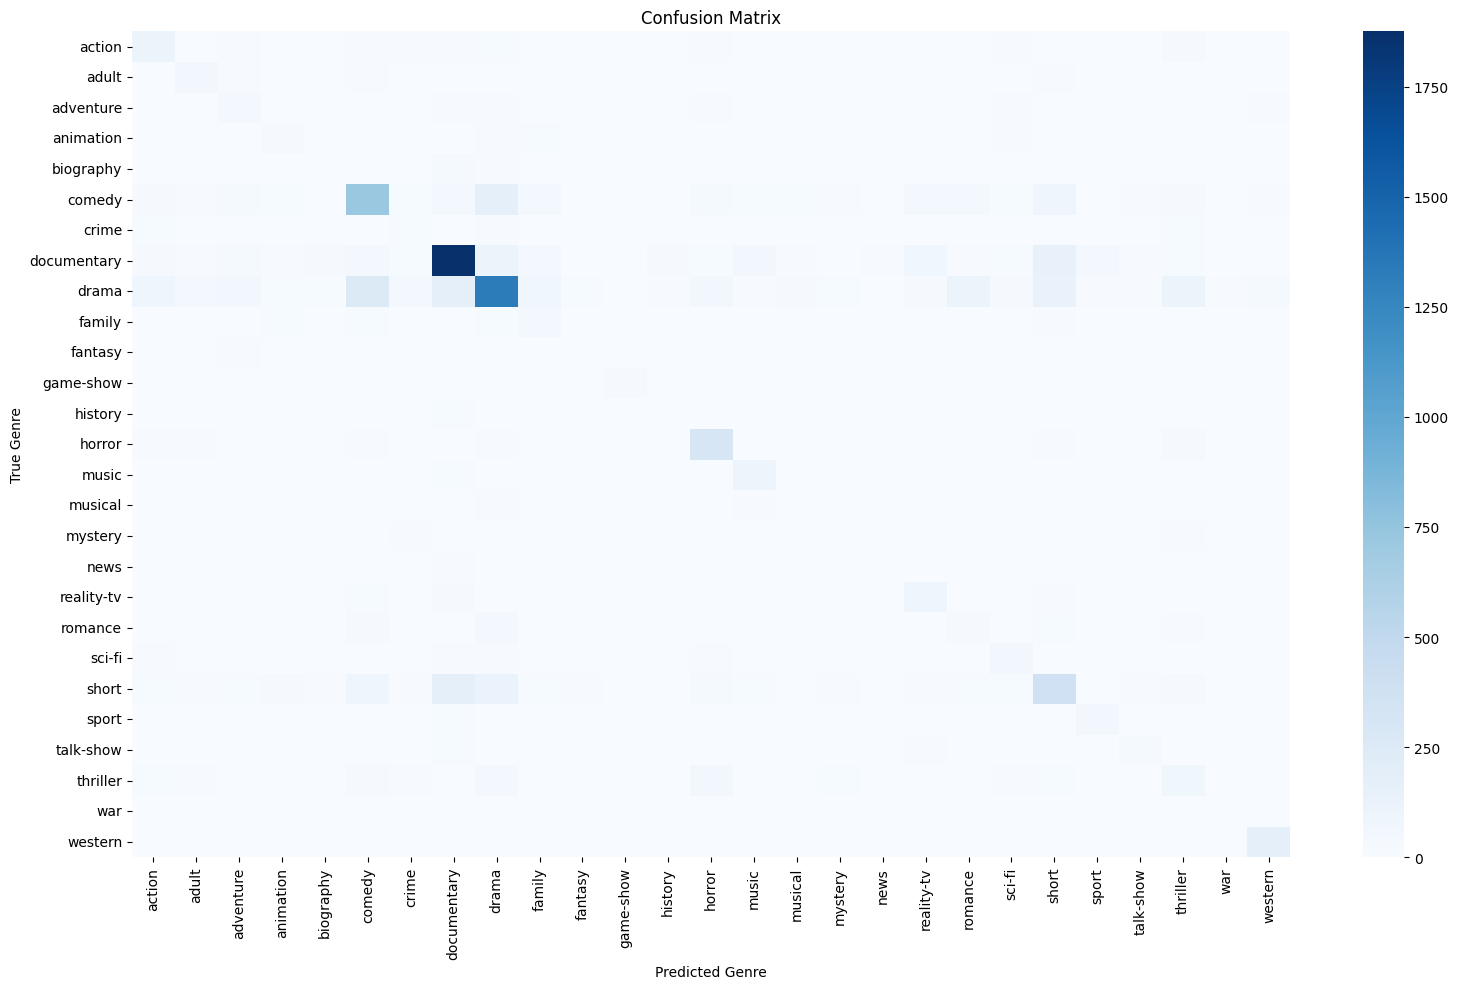

In [31]:
cm = confusion_matrix(y_val, y_pred, labels=svm_model.classes_)


plt.figure(figsize=(16, 10))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Genre")
plt.ylabel("True Genre")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-32-1260932956>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report_df.index, y=report_df['f1-score'], palette="magma")


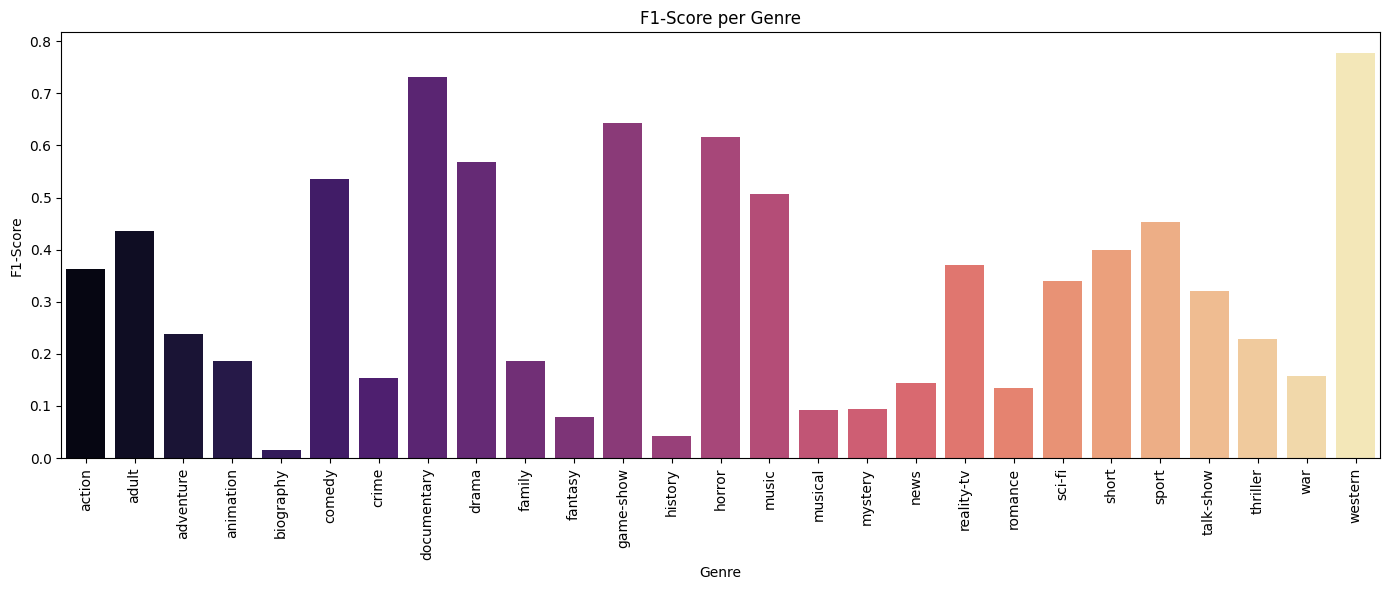

In [32]:
report = classification_report(y_val, y_pred, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report).transpose()


report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'])


plt.figure(figsize=(14, 6))
sns.barplot(x=report_df.index, y=report_df['f1-score'], palette="magma")
plt.title("F1-Score per Genre")
plt.xticks(rotation=90)
plt.ylabel("F1-Score")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

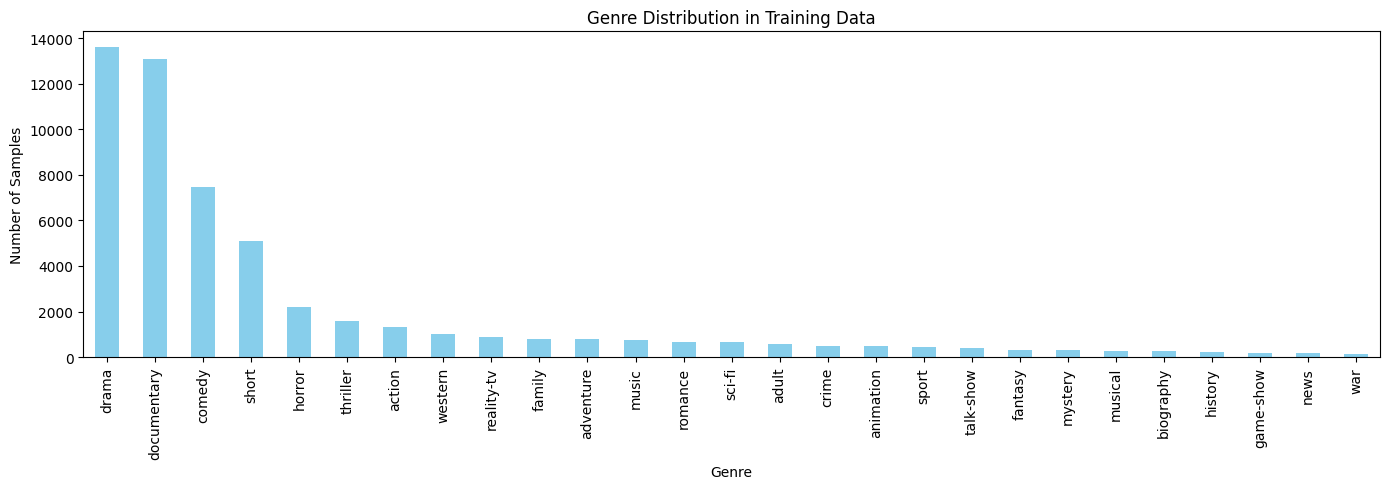

In [27]:
plt.figure(figsize=(14, 5))
train_df['genre'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Genre Distribution in Training Data")
plt.xlabel("Genre")
plt.ylabel("Number of Samples")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()